### Federico Ariton Higher Diploma in Science in Data Analytics for Business CA 1 Student Number:sba22090

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
import warnings
warnings.filterwarnings('ignore') 

# Characterisation

In [2]:
# Importing the dataset
Covid_Data = pd.read_csv('Covid_Data.csv')
Covid_Data

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97


In [3]:
Covid_Data.shape

(1048575, 21)

In [4]:
Covid_Data.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.632194e+00,8.980565e+00,1.499259e+00,1.190765e+00,7.952288e+01,3.346831e+00,4.179410e+01,4.976558e+01,2.186404e+00,2.260569e+00,2.242626e+00,2.298132e+00,2.128989e+00,2.435143e+00,2.261810e+00,2.125176e+00,2.257180e+00,2.214333e+00,5.305653e+00,7.955397e+01
std,4.822084e-01,3.723278e+00,4.999997e-01,3.929041e-01,3.686889e+01,1.191288e+01,1.690739e+01,4.751073e+01,5.424242e+00,5.132258e+00,5.114089e+00,5.462843e+00,5.236397e+00,6.646676e+00,5.194850e+00,5.175445e+00,5.135354e+00,5.323097e+00,1.881165e+00,3.682307e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,3.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,9.700000e+01
50%,2.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,4.000000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00,9.700000e+01
75%,2.000000e+00,1.200000e+01,2.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,5.300000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,9.700000e+01
max,2.000000e+00,1.300000e+01,2.000000e+00,2.000000e+00,9.900000e+01,9.900000e+01,1.210000e+02,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,7.000000e+00,9.900000e+01


In [5]:
Covid_Data.isnull().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

In [6]:
Covid_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [7]:
Covid_Data.dtypes

USMER                    int64
MEDICAL_UNIT             int64
SEX                      int64
PATIENT_TYPE             int64
DATE_DIED               object
INTUBED                  int64
PNEUMONIA                int64
AGE                      int64
PREGNANT                 int64
DIABETES                 int64
COPD                     int64
ASTHMA                   int64
INMSUPR                  int64
HIPERTENSION             int64
OTHER_DISEASE            int64
CARDIOVASCULAR           int64
OBESITY                  int64
RENAL_CHRONIC            int64
TOBACCO                  int64
CLASIFFICATION_FINAL     int64
ICU                      int64
dtype: object

In [8]:
Covid_Data.describe(include=object)

,DATE_DIED
count,1048575
unique,401
top,9999-99-99
freq,971633


In [9]:
Covid_Data.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')

In [10]:
for col in Covid_Data.columns:
    print(col)
    print(Covid_Data.loc[Covid_Data[col] == 97, col].count())
    print(Covid_Data.loc[Covid_Data[col] == 98, col].count())
    print(Covid_Data.loc[Covid_Data[col] == 99, col].count())
    print()

USMER
0
0
0

MEDICAL_UNIT
0
0
0

SEX
0
0
0

PATIENT_TYPE
0
0
0

DATE_DIED
0
0
0

INTUBED
848544
0
7325

PNEUMONIA
0
0
16003

AGE
135
124
86

PREGNANT
523511
3754
0

DIABETES
0
3338
0

COPD
0
3003
0

ASTHMA
0
2979
0

INMSUPR
0
3404
0

HIPERTENSION
0
3104
0

OTHER_DISEASE
0
5045
0

CARDIOVASCULAR
0
3076
0

OBESITY
0
3032
0

RENAL_CHRONIC
0
3006
0

TOBACCO
0
3220
0

CLASIFFICATION_FINAL
0
0
0

ICU
848544
0
7488



# Data Cleannig

In [11]:
Covid_Data.groupby(['PREGNANT','SEX'])['SEX'].count()

PREGNANT  SEX
1         1        8131
2         1      513179
97        2      523511
98        1        3754
Name: SEX, dtype: int64

In [12]:
Covid_Data.PREGNANT = Covid_Data.PREGNANT.replace(97, 2) 
Covid_Data.PREGNANT = Covid_Data.PREGNANT.replace(98, 2)

In [13]:
Covid_Data.groupby(['PREGNANT','SEX'])['SEX'].count()

PREGNANT  SEX
1         1        8131
2         1      516933
          2      523511
Name: SEX, dtype: int64

In [14]:
# List of columns to check
columns_to_filter = ['PNEUMONIA', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 
                     'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 
                     'OBESITY', 'RENAL_CHRONIC', 'TOBACCO']

# Loop through each column and apply the filter
for col in columns_to_filter:
    Covid_Data = Covid_Data[Covid_Data[col].isin([1, 2])]

print(f'shape of dataset: - {Covid_Data.shape}')


shape of dataset: - (1025152, 21)


In [15]:
Covid_Data['ICU'].value_counts()

97    833253
2     173154
1      16434
99      2311
Name: ICU, dtype: int64

In [16]:
Covid_Data['INTUBED'].value_counts()

97    833253
2     156712
1      33034
99      2153
Name: INTUBED, dtype: int64

In [17]:
Covid_Data.drop(['ICU', 'INTUBED'], axis=1, inplace=True)
Covid_Data.shape

(1025152, 19)

In [18]:
Covid_Data

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL
0,2,1,1,1,03/05/2020,1,65,2,2,2,2,2,1,2,2,2,2,2,3
1,2,1,2,1,03/06/2020,1,72,2,2,2,2,2,1,2,2,1,1,2,5
2,2,1,2,2,09/06/2020,2,55,2,1,2,2,2,2,2,2,2,2,2,3
3,2,1,1,1,12/06/2020,2,53,2,2,2,2,2,2,2,2,2,2,2,7
4,2,1,2,1,21/06/2020,2,68,2,1,2,2,2,1,2,2,2,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,2,40,2,2,2,2,2,2,2,2,2,2,2,7
1048571,1,13,2,2,9999-99-99,2,51,2,2,2,2,2,1,2,2,2,2,2,7
1048572,2,13,2,1,9999-99-99,2,55,2,2,2,2,2,2,2,2,2,2,2,7
1048573,2,13,2,1,9999-99-99,2,28,2,2,2,2,2,2,2,2,2,2,2,7


changing the value of death with the date 9999-99-99 that mean it wasn't dead,so whe change the values with the value of 2 "no" change and the other dates with 1 "yes"

In [19]:
# Create the 'DEATH' column using vectorized comparison
Covid_Data['DEATH'] = (Covid_Data['DATE_DIED'] == '9999-99-99').astype(int) + 1

# Count the values in 'DEATH'
death_counts = Covid_Data['DEATH'].value_counts()

In [20]:
Covid_Data['DEATH'].value_counts()

2    950438
1     74714
Name: DEATH, dtype: int64

In [21]:
Covid_Data.drop('DATE_DIED', axis=1, inplace=True)
Covid_Data.shape

(1025152, 19)

In [23]:
Covid_Data.colums

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'PNEUMONIA', 'AGE',
       'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION',
       'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC',
       'TOBACCO', 'CLASIFFICATION_FINAL', 'DEATH'],
      dtype='object')

# EDA

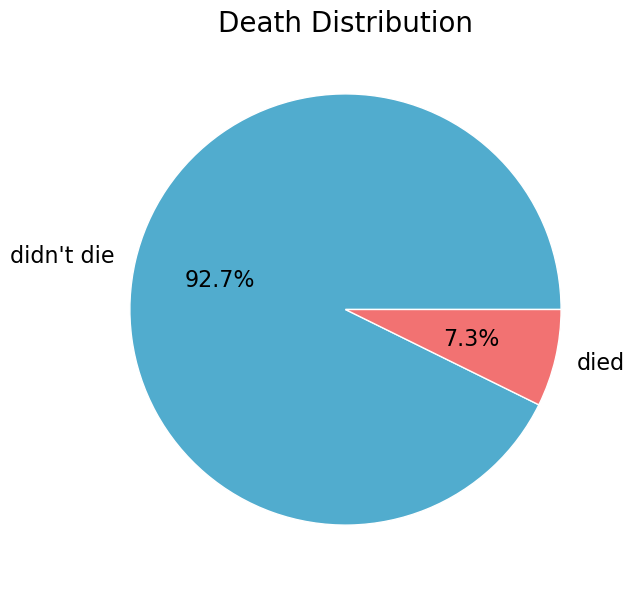

In [28]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.pie(
    Covid_Data.DEATH.value_counts().values, labels=['didn\'t die', 'died'], autopct='%1.1f%%',
    startangle=0, textprops={'fontsize': 16}, wedgeprops={'edgecolor': '#fff'}, colors=['#51ACCE', '#F27272']
)
ax.set_title('Death Distribution', fontsize=20, color='black')
plt.show()

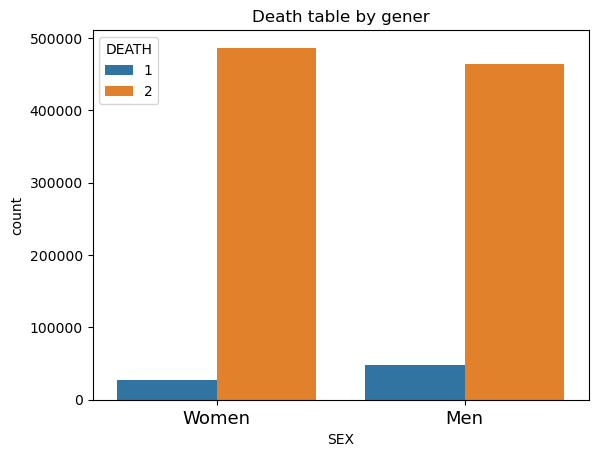

In [36]:
sns.countplot(x='SEX' , hue = 'DEATH',data = Covid_Data)
plt.title('Death table by gener')
plt.xticks([0, 1], ['Women', 'Men'], fontsize=13);